In [1]:
def define_category(composition):
        
    category1=0
    if composition[4] == 11:
        category1 = 1
    elif composition[4] == 17:
        category1 = 2


    composition.append(category1)
    
    return composition



In [2]:
import pickle
from joblib import dump, load
import csv
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import math

import util
from util import cut_feature
from util import calculate_ZT
from elements import ELEMENTS
from myfunction import my_range
from feature import construct_feature

#full column list of dataset
column=['id','direction','temp',\
          'vbm_e','vbm_e2','vbm_e3',\
          'cbm_e','cbm_e2','cbm_e3','magnetism','deep_level',\
          'vbm_org_1', 'vbm_org_2','vbm_org_3','cbm_org_1','cbm_org_2','cbm_org_3',\
          'vbm_m','vbm_m2','vbm_m3','cbm_m','cbm_m2','cbm_m3',\
          'vbm_e_sn','vbm_e2_sn','vbm_e3_sn','cbm_e_sn','cbm_e2_sn','cbm_e3_sn',\
          'vbm_e_se','vbm_e2_se','vbm_e3_se','cbm_e_se','cbm_e2_se','cbm_e3_se',\
          'vbm_m_sn', 'vbm_m2_sn','vbm_m3_sn','cbm_m_sn','cbm_m2_sn','cbm_m3_sn',\
          'vbm_m_se', 'vbm_m2_se','vbm_m3_se','cbm_m_se','cbm_m2_se','cbm_m3_se',\
        'bandgap','bandgap_sn', 'bandgap_se', 'bandgap_rate',\
          'ion','covalent','vdw','atomic_radius','pauling_en','en_allen','polarizability','melting_point',\
          'boiling_point','density','specific_heat','thermal_conductivity',\
        'Sn_ratio','Se_ratio','Na_ratio','Cl_ratio','dopant_num', 'dopant_ratio']

column=['id','direction','temp',\
          'vbm_e','vbm_e2','vbm_e3',\
          'cbm_e','cbm_e2','cbm_e3','magnetism','deep_level',\
          'vbm_org_1', 'vbm_org_2','vbm_org_3','cbm_org_1','cbm_org_2','cbm_org_3',\
          'vbm_m','vbm_m2','vbm_m3','cbm_m','cbm_m2','cbm_m3',\
          'vbm_e_sn','vbm_e2_sn','vbm_e3_sn','cbm_e_sn','cbm_e2_sn','cbm_e3_sn',\
          'vbm_e_se','vbm_e2_se','vbm_e3_se','cbm_e_se','cbm_e2_se','cbm_e3_se',\
          'vbm_m_sn', 'vbm_m2_sn','vbm_m3_sn','cbm_m_sn','cbm_m2_sn','cbm_m3_sn',\
          'vbm_m_se', 'vbm_m2_se','vbm_m3_se','cbm_m_se','cbm_m2_se','cbm_m3_se',\
        'bandgap','bandgap_sn', 'bandgap_se', 'bandgap_rate',\
          'ion','covalent','vdw','atomic_radius','pauling_en','en_allen','polarizability','melting_point',\
          'boiling_point','density','specific_heat','thermal_conductivity',\
        'Sn_ratio','Se_ratio','Na_ratio','Cl_ratio','dopant_num', 'dopant_ratio'] 
#construct featureset
start_features=features=['vbm_e','vbm_e2','vbm_e3',\
          'cbm_e','cbm_e2','cbm_e3','magnetism','deep_level',\
          'vbm_org_1', 'vbm_org_2','vbm_org_3','cbm_org_1','cbm_org_2','cbm_org_3',\
          'vbm_m','vbm_m2','vbm_m3','cbm_m','cbm_m2','cbm_m3',\
        'vbm_e_sn','vbm_e2_sn','vbm_e3_sn','cbm_e_sn','cbm_e2_sn','cbm_e3_sn',\
          'vbm_e_se','vbm_e2_se','vbm_e3_se','cbm_e_se','cbm_e2_se','cbm_e3_se',\
          'vbm_m_sn', 'vbm_m2_sn','vbm_m3_sn','cbm_m_sn','cbm_m2_sn','cbm_m3_sn',\
          'vbm_m_se', 'vbm_m2_se','vbm_m3_se','cbm_m_se','cbm_m2_se','cbm_m3_se',\
          'vbm_ordering','cbm_ordering', 'vbm_org_ordering','cbm_org_ordering',\
          'vbm_sn_ordering','cbm_sn_ordering','vbm_se_ordering','cbm_se_ordering',\
          'bandgap','bandgap_sn', 'bandgap_se', 'bandgap_rate',\
          'ion','covalent','vdw','atomic_radius','pauling_en','en_allen','polarizability','melting_point',\
          'boiling_point','density','specific_heat','thermal_conductivity']



#used features for model construction
feature=['direction','temp',\
          'magnetism','deep_level',\
         'vbm_org_1', 'vbm_org_2','vbm_org_3','cbm_org_1','cbm_org_2','cbm_org_3',\
          'vbm_m','vbm_m2','vbm_m3','cbm_m','cbm_m2','cbm_m3',\
          'vbm_e_sn','vbm_e2_sn','vbm_e3_sn','cbm_e_sn','cbm_e2_sn','cbm_e3_sn',\
          'vbm_e_se','vbm_e2_se','vbm_e3_se','cbm_e_se','cbm_e2_se','cbm_e3_se',\
          'vbm_m_sn', 'vbm_m2_sn','vbm_m3_sn','cbm_m_sn','cbm_m2_sn','cbm_m3_sn',\
          'vbm_m_se', 'vbm_m2_se','vbm_m3_se','cbm_m_se','cbm_m2_se','cbm_m3_se',\
          'bandgap','bandgap_sn', 'bandgap_se', 'bandgap_rate',\
          'ion','covalent','vdw','atomic_radius','pauling_en','en_allen','polarizability','melting_point',\
          'boiling_point','density','specific_heat','thermal_conductivity',\
          'Sn_ratio','Se_ratio','Na_ratio','Cl_ratio','dopant_num', 'dopant_ratio']





In [3]:

filename='./inputdata/solubility_total.csv'
solubility_df=pd.read_csv(filename,index_col=0)
solubility_atomlist=solubility_df['atom'].values.tolist()
solubility=solubility_df.solubility.values


In [4]:
#ZT screening


starttemp  = 300
endtemp    = 820
steptemp   = 20

zero=0
startratio = 1
endratio   = 5
stepratio  = 1

#search list construction

dopingset=['Na','Na_se_site','Cl','Cl_se_site']

element_list_Sn=['Li','Be', 'B','C','Na','Mg', 'Al','Si','P','K','Ca','Sc','Ti','V','Cr','Mn','Fe',\
                'Co','Ni','Cu','Zn','Ga','Ge','As','Rb','Sr','Y','Zr','Nb','Mo','Ru','Rh','Pd','Ag',\
                'Cd','In','Sb','Re','Cs','Ba','Hf','Ta','W','Re','Os','Ir','Pt','Au','Hg','Tl','Pb','Bi']

element_list_Se=['N','O','F','S','Cl','Br','Te','I']
ids=0
for ordering in dopingset:
    
    csvfile1='./inputdata_search/test_'+str(ordering)+'.csv'
    numrow=0


    with open(csvfile1,"w") as output1: 
        writer1 = csv.writer(output1, lineterminator='\n')
        writer1.writerow(["","ID","Sn_ratio","Se_ratio","dopant1_num","dopant1_ratio","dopant2_num","dopant2_ratio",\
                          "dopant3_num","dopant3_ratio","direction","Temp","category"])    

        if ordering == 'Na':
            element_list=element_list_Sn
        elif ordering == 'Cl':
            element_list=element_list_Sn

        elif ordering == 'Na_se_site':
            element_list=element_list_Se
        elif ordering == 'Cl_se_site':
            element_list=element_list_Se
            
        print(element_list)
        
        for element in element_list:
            
            endratio_s=solubility[solubility_atomlist.index(element)]
            endratio_s=round(endratio_s)
            
            if endratio > endratio_s:
                endratio = endratio_s
            if endratio_s > 0.5 and endratio_s < 1.0:
                endratio = 1            

            
            for ii in my_range(startratio,endratio,stepratio):  #from 1% to 3%, stepsize=1%

                if ii ==5 :
                    vacancy = 0
                elif ii==4 : 
                    vacancy = 1
                else:
                    vacancy = 2


                for jj in my_range(0,vacancy,stepratio):  #from 1% to 3%, stepsize=1%

                    x_trial=[] 
                    y_fitted=[]

                    for direction in [0,1]:

                        for i in my_range(starttemp,endtemp,steptemp): #input of temperature data

                        # Sn substitute & Na 1%
                            if ordering == 'Na' :
                                composition= [numrow,'TY'+str("{0:0=4d}".format(ids)),(1-(ii+jj)*0.01)*0.99,1,11,0.01,\
                                              ELEMENTS[element].number,ii*0.01*0.99,0,0,direction,i]
                            elif ordering == 'Na_se_site' :
                                composition= [numrow,'TY'+str("{0:0=4d}".format(ids)),(1-jj*0.01-0.01),(1-ii*0.01),11,0.01,\
                                              ELEMENTS[element].number,ii*0.01,0,0,direction,i]
                              
                            elif ordering == 'Cl':
                                composition= [numrow,'TY'+str("{0:0=4d}".format(ids)),(1-(ii+jj)*0.01),0.99,17,0.01,\
                                              ELEMENTS[element].number,ii*0.01,0,0,direction,i]
                            elif ordering == 'Cl_se_site':
                                composition= [numrow,'TY'+str("{0:0=4d}".format(ids)),(1-jj*0.01),(1-ii*0.01)*0.99,17,0.01,\
                                              ELEMENTS[element].number,ii*0.01*0.99,0,0,direction,i]

                                
                            define_category(composition)
                            writer1.writerow(composition)
                            numrow+=1
                        ids+=1
            endratio=5                  
    

    cal =pd.read_excel('./inputdata/Results_Summary_Final.xlsx',index_col=0)
    calnum=np.zeros((cal.shape[0],cal.shape[1]))
    calnum = cal.values

    #construct feature
    thermo  = pd.read_csv(csvfile1, index_col=0)
    test_data_x = construct_feature(thermo,calnum,start_features, False)
    output=pd.DataFrame(test_data_x)
    output.columns=column
    output.to_csv('./inputdata_search/test_search_in_'+str(ordering)+'.csv')
    print('write complete ', ordering, ids)



['Li', 'Be', 'B', 'C', 'Na', 'Mg', 'Al', 'Si', 'P', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sb', 'Re', 'Cs', 'Ba', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi']
write complete  Na 446
['N', 'O', 'F', 'S', 'Cl', 'Br', 'Te', 'I']
write complete  Na_se_site 554
['Li', 'Be', 'B', 'C', 'Na', 'Mg', 'Al', 'Si', 'P', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sb', 'Re', 'Cs', 'Ba', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi']
write complete  Cl 1000
['N', 'O', 'F', 'S', 'Cl', 'Br', 'Te', 'I']
write complete  Cl_se_site 1108


In [5]:
#predict thermoelectric properties

measureset=['electrical_conductivity','seebeck_coeff','thermal_conductivity']

dopingset=['Na','Na_se_site','Cl','Cl_se_site']

fold=5

for doping in dopingset:
    
    thermo  = pd.read_csv('./inputdata_search/test_'+str(doping)+'.csv', index_col=0)  #data list
    test_data_x = pd.read_csv('./inputdata_search/test_search_in_'+str(doping)+'.csv', index_col=0).values # feature list

    predicted=np.zeros((len(measureset),test_data_x.shape[0]))
    
    for iii, measure in enumerate(measureset):
    
    
        testin=cut_feature(column,feature, test_data_x)
   
        for kkk in range(fold):

            filename = './outputdata/'+str(measure) + '_'+str(kkk)+'_'+'seed_'+str(0)+".joblib"

            clf = load(filename)
            predicted[iii,:] += clf.predict(testin)


    predicted /= fold
    temp = thermo.Temp
    ZT=calculate_ZT(predicted,temp,0,thermo, False, './outputdata_search/zt_search_'+str(doping)+'.csv')



In [6]:
#data processing

for doping in ['Na','Cl']:

    data= pd.read_csv('./outputdata_search/zt_search_'+str(doping)+'.csv', index_col=0)
    data2=pd.read_csv('./outputdata_search/zt_search_'+str(doping)+'_se_site.csv', index_col=0)
    thermo=pd.merge(data,data2, how='outer')


    thermo1=thermo  
    thermo1=thermo1.reset_index(drop=True)  
    #display(thermo1)
    thermo1.to_csv("./outputdata_search/test"+str(doping)+".csv")    
    
    temp=thermo1.Temp
    ZT=thermo1.ZT
    temp_pick=[]
    zt_pick=[]
    dopant_pick=[]
    id_pick=[]
    id=thermo1.ID
    
    zt_top=[]
    
    # find maximum ZT of a given sample
    for i in range(len(temp)):

        temp_pick.append(temp[i])
        zt_pick.append(ZT[i])

        if i == len(temp)-1:
            zt_top.append([id[i],thermo1["Sn_ratio"][i],thermo1["Se_ratio"][i],doping,thermo1["dopant1_ratio"][i],\
              str(ELEMENTS[thermo1["dopant2_num"][i]].symbol),thermo1["dopant2_num"][i], thermo1["dopant2_ratio"][i], \
                           thermo1["direction"][i],temp_pick[zt_pick.index(np.max(zt_pick))],np.max(zt_pick)])

            break  

        elif id[i] != id[i+1]:


            zt_top.append([id[i],thermo1["Sn_ratio"][i],thermo1["Se_ratio"][i], doping,thermo1["dopant1_ratio"][i],\
              str(ELEMENTS[thermo1["dopant2_num"][i]].symbol),thermo1["dopant2_num"][i], thermo1["dopant2_ratio"][i], \
                           thermo1["direction"][i],temp_pick[zt_pick.index(np.max(zt_pick))],np.max(zt_pick)])

            temp_pick=[]
            zt_pick=[]


    zt_max=pd.DataFrame(zt_top)
    name=['id','Sn_ratio','Se_ratio',doping,str(doping)+'_ratio','dopant_name','dopant','dopant_ratio','direction','temp','ZT']
    zt_max.columns=name
    zt_max.to_csv('./outputdata_search/max_zt_id_'+str(doping)+'.csv')

    x=zt_max.dopant
    zt_list=zt_max.ZT
    zt_pick=[]
    id_pick=[]
    id_list=zt_max.id
    
    zt_dopant=[]
    
    # find maximum ZT of a given dopant
    for i in range(len(zt_list)):

        id_pick.append(i)
        zt_pick.append(zt_list[i])

        if i == len(zt_list)-1 : 
            ttt = id_pick[zt_pick.index(max(zt_pick))]
            zt_dopant.append([id_list[ttt],zt_max["Sn_ratio"][ttt],zt_max["Se_ratio"][ttt],doping,zt_max[str(doping)+'_ratio'][ttt],\
               str(ELEMENTS[zt_max["dopant"][ttt]].symbol),zt_max["dopant"][ttt],zt_max["dopant_ratio"][ttt], \
                zt_max["direction"][ttt],' %.4f ' % np.max(zt_pick)])
            break

        elif x[i] != x[i+1]:

            ttt = id_pick[zt_pick.index(max(zt_pick))]


            zt_dopant.append([id_list[ttt],zt_max["Sn_ratio"][ttt],zt_max["Se_ratio"][ttt],doping,zt_max[str(doping)+"_ratio"][ttt],\
              str(ELEMENTS[zt_max["dopant"][ttt]].symbol),zt_max["dopant"][ttt], zt_max["dopant_ratio"][ttt], \
                zt_max["direction"][ttt], ' %.4f ' %np.max(zt_pick)])


            zt_pick=[]      
            id_pick=[]

    df=pd.DataFrame(zt_dopant)        
    name=['id','Sn_ratio','Se_ratio',doping,str(doping)+'_ratio','dopant','dopant_num','dopant_ratio','direction','ZT']
    df.columns=name

    
    
    
    display(df)
    df.to_csv("./outputdata_search/max_zt_list_"+str(doping)+".csv")



C:\Users\Yealee\AppData\Roaming\Python\Python38\site-packages\pandas\core\reshape\merge.py:1214: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


,id,Sn_ratio,Se_ratio,Na,Na_ratio,dopant,dopant_num,dopant_ratio,direction,ZT
0,TY0014,0.9504,1.00,Na,0.01,Li,3,0.0297,0,1.7043
1,TY0034,0.9504,1.00,Na,0.01,Na,11,0.0198,0,1.5543
2,TY0058,0.9504,1.00,Na,0.01,Mg,12,0.0198,0,1.6510
3,TY0070,0.9504,1.00,Na,0.01,P,15,0.0198,0,1.3026
4,TY0092,0.9504,1.00,Na,0.01,K,19,0.0198,0,1.6016
5,TY0116,0.9504,1.00,Na,0.01,Ca,20,0.0198,0,1.7125
6,TY0134,0.9603,1.00,Na,0.01,Mn,25,0.0099,0,1.6909
7,TY0172,0.9504,1.00,Na,0.01,Ge,32,0.0396,0,2.3927
8,TY0196,0.9504,1.00,Na,0.01,As,33,0.0396,0,2.0052
9,TY0206,0.9603,1.00,Na,0.01,Rb,37,0.0099,0,1.8528


,id,Sn_ratio,Se_ratio,Cl,Cl_ratio,dopant,dopant_num,dopant_ratio,direction,ZT
0,TY0570,0.95,0.9900,Cl,0.01,Li,3,0.0300,0,1.5024
1,TY0594,0.95,0.9900,Cl,0.01,Na,11,0.0300,0,1.4932
2,TY0610,0.97,0.9900,Cl,0.01,Mg,12,0.0200,0,1.9801
3,TY0624,0.96,0.9900,Cl,0.01,P,15,0.0200,0,1.2628
4,TY0652,0.95,0.9900,Cl,0.01,K,19,0.0300,0,1.5350
5,TY0676,0.95,0.9900,Cl,0.01,Ca,20,0.0300,0,1.9954
6,TY0686,0.98,0.9900,Cl,0.01,Mn,25,0.0100,0,1.7314
7,TY0716,0.97,0.9900,Cl,0.01,Ge,32,0.0200,0,1.8112
8,TY0752,0.95,0.9900,Cl,0.01,As,33,0.0400,0,1.7134
9,TY0766,0.96,0.9900,Cl,0.01,Rb,37,0.0200,0,1.4294


TY0172 2.3927
TY0412 2.256
TY0242 2.0808
TY0270 2.072
TY0196 2.0052


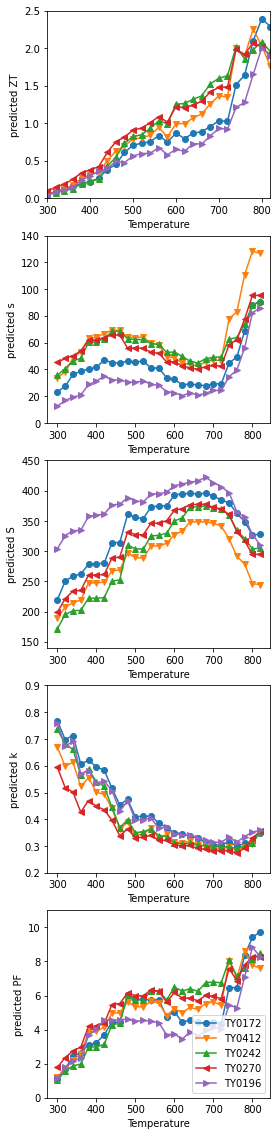

,id,Sn_ratio,Se_ratio,Na,Na_ratio,dopant,dopant_num,dopant_ratio,direction,ZT
7,TY0172,0.9504,1.00,Na,0.01,Ge,32,0.0396,0,2.3927
20,TY0412,0.9504,1.00,Na,0.01,Pb,82,0.0297,0,2.2560
11,TY0242,0.9603,1.00,Na,0.01,Y,39,0.0099,0,2.0808
13,TY0270,0.9702,1.00,Na,0.01,Cd,48,0.0099,0,2.0720
8,TY0196,0.9504,1.00,Na,0.01,As,33,0.0396,0,2.0052
18,TY0370,0.9603,1.00,Na,0.01,Hg,80,0.0198,0,1.9687
10,TY0218,0.9603,1.00,Na,0.01,Sr,38,0.0099,0,1.9120
27,TY0550,0.9800,0.99,Na,0.01,I,53,0.0100,0,1.8551
9,TY0206,0.9603,1.00,Na,0.01,Rb,37,0.0099,0,1.8528
19,TY0382,0.9603,1.00,Na,0.01,Tl,81,0.0198,0,1.8491


{'H': 0, 'He': 0, 'Li': 1.7, 'Be': 0, 'B': 0, 'C': 0, 'N': 0, 'O': 0, 'F': 1.21, 'Ne': 0, 'Na': 1.55, 'Mg': 1.65, 'Al': 0, 'Si': 0, 'P': 1.3, 'S': 1.49, 'Cl': 1.32, 'Ar': 0, 'K': 1.6, 'Ca': 1.71, 'Sc': 0, 'Ti': 0, 'V': 0, 'Cr': 0, 'Mn': 1.69, 'Fe': 0, 'Co': 0, 'Ni': 0, 'Cu': 0, 'Zn': 0, 'Ga': 0, 'Ge': 2.39, 'As': 2.01, 'Se': 0, 'Br': 1.8, 'Kr': 0, 'Rb': 1.85, 'Sr': 1.91, 'Y': 2.08, 'Zr': 0, 'Nb': 0, 'Mo': 0, 'Tc': 0, 'Ru': 0, 'Rh': 0, 'Pd': 0, 'Ag': 1.53, 'Cd': 2.07, 'In': 1.59, 'Sn': 0, 'Sb': 1.35, 'Te': 1.62, 'I': 1.86, 'Xe': 0, 'Cs': 0, 'Ba': 1.81, 'La': 0, 'Ce': 0, 'Pr': 0, 'Nd': 0, 'Pm': 0, 'Sm': 0, 'Eu': 0, 'Gd': 0, 'Tb': 0, 'Dy': 0, 'Ho': 0, 'Er': 0, 'Tm': 0, 'Yb': 0, 'Lu': 0, 'Hf': 0, 'Ta': 0, 'W': 0, 'Re': 0, 'Os': 0, 'Ir': 0, 'Pt': 0, 'Au': 1.58, 'Hg': 1.97, 'Tl': 1.85, 'Pb': 2.26, 'Bi': 1.38, 'Po': 0, 'At': 0, 'Rn': 0, 'Fr': 0, 'Ra': 0, 'Ac': 0, 'Th': 0, 'Pa': 0, 'U': 0, 'Np': 0, 'Pu': 0, 'Am': 0, 'Cm': 0, 'Bk': 0, 'Cf': 0, 'Es': 0, 'Fm': 0, 'Md': 0, 'No': 0, 'Lr': 0, 'Rf': 

C:\Users\Yealee\내 드라이브\machine_learning\Machine_learning_GBRT\20220428-xgboost_1.4.2_SnSe_code_final\periodic_table_heatmap.py:121: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("YlOrRd").copy()
  cbar.cmap.set_under(blank_color)


TY0968 2.0264
TY0676 1.9954


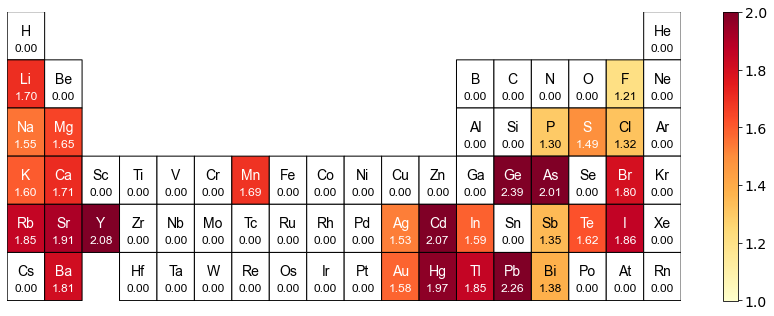

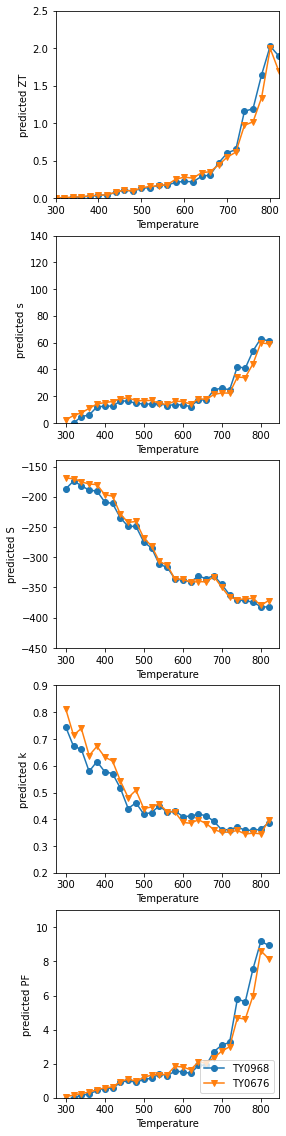

,id,Sn_ratio,Se_ratio,Cl,Cl_ratio,dopant,dopant_num,dopant_ratio,direction,ZT
20,TY0968,0.95,0.9900,Cl,0.01,Pb,82,0.0300,0,2.0264
5,TY0676,0.95,0.9900,Cl,0.01,Ca,20,0.0300,0,1.9954
2,TY0610,0.97,0.9900,Cl,0.01,Mg,12,0.0200,0,1.9801
11,TY0794,0.98,0.9900,Cl,0.01,Y,39,0.0100,0,1.8924
7,TY0716,0.97,0.9900,Cl,0.01,Ge,32,0.0200,0,1.8112
6,TY0686,0.98,0.9900,Cl,0.01,Mn,25,0.0100,0,1.7314
8,TY0752,0.95,0.9900,Cl,0.01,As,33,0.0400,0,1.7134
16,TY0902,0.95,0.9900,Cl,0.01,Ba,56,0.0300,0,1.6654
23,TY1022,0.98,0.9603,Cl,0.01,S,16,0.0297,0,1.6566
10,TY0784,0.95,0.9900,Cl,0.01,Sr,38,0.0300,0,1.6487


{'H': 0, 'He': 0, 'Li': 1.5, 'Be': 0, 'B': 0, 'C': 0, 'N': 0, 'O': 0, 'F': 1.08, 'Ne': 0, 'Na': 1.49, 'Mg': 1.98, 'Al': 0, 'Si': 0, 'P': 1.26, 'S': 1.66, 'Cl': 1.28, 'Ar': 0, 'K': 1.54, 'Ca': 2.0, 'Sc': 0, 'Ti': 0, 'V': 0, 'Cr': 0, 'Mn': 1.73, 'Fe': 0, 'Co': 0, 'Ni': 0, 'Cu': 0, 'Zn': 0, 'Ga': 0, 'Ge': 1.81, 'As': 1.71, 'Se': 0, 'Br': 1.38, 'Kr': 0, 'Rb': 1.43, 'Sr': 1.65, 'Y': 1.89, 'Zr': 0, 'Nb': 0, 'Mo': 0, 'Tc': 0, 'Ru': 0, 'Rh': 0, 'Pd': 0, 'Ag': 1.23, 'Cd': 1.63, 'In': 1.1, 'Sn': 0, 'Sb': 1.26, 'Te': 1.45, 'I': 1.43, 'Xe': 0, 'Cs': 0, 'Ba': 1.67, 'La': 0, 'Ce': 0, 'Pr': 0, 'Nd': 0, 'Pm': 0, 'Sm': 0, 'Eu': 0, 'Gd': 0, 'Tb': 0, 'Dy': 0, 'Ho': 0, 'Er': 0, 'Tm': 0, 'Yb': 0, 'Lu': 0, 'Hf': 0, 'Ta': 0, 'W': 0, 'Re': 0, 'Os': 0, 'Ir': 0, 'Pt': 0, 'Au': 1.26, 'Hg': 1.61, 'Tl': 1.33, 'Pb': 2.03, 'Bi': 1.15, 'Po': 0, 'At': 0, 'Rn': 0, 'Fr': 0, 'Ra': 0, 'Ac': 0, 'Th': 0, 'Pa': 0, 'U': 0, 'Np': 0, 'Pu': 0, 'Am': 0, 'Cm': 0, 'Bk': 0, 'Cf': 0, 'Es': 0, 'Fm': 0, 'Md': 0, 'No': 0, 'Lr': 0, 'Rf':

C:\Users\Yealee\내 드라이브\machine_learning\Machine_learning_GBRT\20220428-xgboost_1.4.2_SnSe_code_final\periodic_table_heatmap.py:121: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("YlOrRd").copy()
  cbar.cmap.set_under(blank_color)


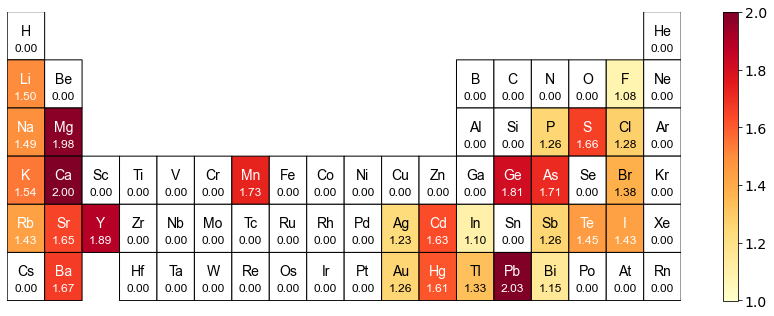

In [7]:
from elements import ELEMENTS
import matplotlib.pyplot as plt
from periodic_table_heatmap import periodic_table_heatmap 
from bokeh.sampledata.periodic_table import elements

for doping in ['Na','Cl']:
    thermo=pd.read_csv('./outputdata_search/zt_search_'+str(doping)+'.csv', index_col=0)
    temp_pick=[]
    zt_pick=[]
    dopant_pick=[]
    id_pick=[]
    id=thermo.ID
    temp=thermo.Temp      
    name=thermo.dopant2_num
    ZT=thermo.ZT
    el_cond=thermo.el_cond
    seebeck=thermo.seebeck
    thermal=thermo.thermal


    fig = plt.figure(figsize=(4,20))
    ax0 = plt.subplot(5,1,1)
    ax1 = plt.subplot(5,1,2)
    ax2 = plt.subplot(5,1,3)
    ax3 = plt.subplot(5,1,4)
    ax4 = plt.subplot(5,1,5)

    ax0.set_xlim((300,820))
    #ax.set_ylim((0,4))
    ax0.set_xlabel('Temperature')
    ax1.set_xlabel('Temperature')
    ax2.set_xlabel('Temperature')
    ax3.set_xlabel('Temperature')
    ax4.set_xlabel('Temperature')

    ax0.set_ylabel('predicted ZT')
    ax1.set_ylabel('predicted s')
    ax2.set_ylabel('predicted S')
    ax3.set_ylabel('predicted k')
    ax4.set_ylabel('predicted PF')

    ax0.set_ylim((0,2.5))
    ax1.set_ylim((0,140))
    ax2.set_ylim((140,450))
    if doping == 'Cl':
        ax2.set_ylim((-450,-140))  #for n-type
    ax3.set_ylim((0.2,0.9))
    ax4.set_ylim((0,11))  

    id_pick_1=[]
    id_pick_2=[]
    el_pick=[]
    seebeck_pick=[]
    thermal_pick=[]
    pf_pick=[]
    total_el=[]
    total_seebeck=[]
    total_thermal=[]
    total_zt=[]
    total_temp=[]
    total_pf=[]


    zt_max = pd.read_csv("./outputdata_search/max_zt_list_"+str(doping)+".csv", index_col=0)

    testttt=zt_max.ZT.sort_values(ascending=False)
    id_zt_max=zt_max.id


    for i in range(len(testttt)):

        if zt_max.ZT[testttt.index.values[i]] > 1.99:
            id_pick_1.append(id_zt_max[testttt.index.values[i]])
            id_pick_2.append(testttt.index.values[i])
            print(id_zt_max[testttt.index.values[i]],  zt_max.ZT[testttt.index.values[i]])



    id_pick=list(id_pick_1)
    aaa=[]

    id_pick=list(set(id_pick))    
    id_pick.sort(reverse=False)
    n=0

    mark=['o','v','^','<','>','.','1','2','3','4']


    for i in range(len(temp)):



        if id[i] == id_pick[n]:

            temp_pick.append(temp[i])
            zt_pick.append(ZT[i])
            el_pick.append(el_cond[i])
            seebeck_pick.append(seebeck[i])
            thermal_pick.append(thermal[i])
            pf_pick.append(el_cond[i]*seebeck[i]*seebeck[i]*10**(-6))




            if i == len(temp)-1 :


                temp_pick=[]
                zt_pick=[]
                el_pick=[]
                seebeck_pick=[]
                thermal_pick=[]
                pf_pick=[]

            elif id[i] != id[i+1]:
                total_temp.append(temp_pick)
                total_zt.append(zt_pick)
                total_el.append(el_pick)
                total_seebeck.append(seebeck_pick)
                total_thermal.append(thermal_pick)
                total_pf.append(pf_pick)

                
                temp_pick=[]
                zt_pick=[]
                el_pick=[]
                seebeck_pick=[]
                thermal_pick=[]
                pf_pick=[]            
                if n == len(id_pick)-1:
                    break

                n += 1



    id_pick_3=[]

    for i in id_pick_1:

        id_pick_3.append(id_pick.index(i))

    i=0
    for n in id_pick_3:

        ax0.plot(total_temp[n],total_zt[n],marker=mark[i], label=id_pick[n])
        ax1.plot(total_temp[n],total_el[n],marker=mark[i], label=id_pick[n])
        ax2.plot(total_temp[n],total_seebeck[n],marker=mark[i], label=id_pick[n])
        ax3.plot(total_temp[n],total_thermal[n],marker=mark[i], label=id_pick[n])
        ax4.plot(total_temp[n],total_pf[n],marker=mark[i], label=id_pick[n])
        #print(id_pick[n])
        i+=1

    plt.legend(loc='lower right')
    plt.show()

    fig.savefig('./outputdata_search/max_zt_top6_'+str(doping)+'.pdf', format='pdf')

    df = pd.read_csv('./outputdata_search/max_zt_list_'+str(doping)+'.csv', index_col=0)
    data = df.sort_values(["ZT"], ascending=[False])
    display(data)
    
    


    filename='./outputdata_search/max_zt_list_'+str(doping)+'.csv'
    df=pd.read_csv(filename,index_col=0)
    data_elements=df.dopant
    data=df.ZT
    blank_color='white'
    under_value=0
    over_value=100

    color_list = [blank_color] * len(elements)
    quantity_list=[0]*len(elements)

    for i, data_element in enumerate(data_elements):
        element_entry = elements.symbol[
            elements.symbol.str.lower() == data_element.lower()
            ]

        if element_entry.empty == False:
            element_index = element_entry.index[0]
        else:
            warnings.warn("Invalid chemical symbol: " + data_element)



        if color_list[element_index] != blank_color:
            warnings.warn("Multiple entries for element " + data_element)
        elif under_value is not None and data[i] <= under_value:

            quantity_list[element_index] = round(data[i],2)
        elif over_value is not None and data[i] >= over_value:

            quantity_list[element_index] = round(data[i],2)
        else:

            quantity_list[element_index] = round(data[i],2)


    string_list = elements["symbol"]


    dictionary = dict(zip(string_list, quantity_list))
    print(dictionary)


    fig=periodic_table_heatmap(dictionary, cbar_label='', \
                                                         cbar_label_size=14, show_plot=False, cmap='YlOrRd', \
                                                         cmap_range=(1,2), blank_color='white', edge_color='black', \
                                                         value_format="%.2f", value_fontsize=12, symbol_fontsize=14, \
                                                         max_row=6, readable_fontcolor=True)

    fig.savefig('./outputdata_search/max_zt_list_'+str(doping)+'.pdf')    